## Machine Learning for Regression with Imbalanced Data

- https://towardsdatascience.com/machine-learning-for-regression-with-imbalanced-data-62629d7ad330

In [1]:

import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
%matplotlib inline

pd.options.display.max_columns = 999

여기서는 불균형이 존재하는 데이터셋에 사분위수 평가를 사용하여 알고리즘의 성능을 정량화하는 방법을 보여주며, 알고리즘의 성능을 개선하기 위한 세 가지 전략을 보여드리고자 합니다.

### Example dataset for regression: California housing

In [2]:
from sklearn import datasets

In [3]:
df = pd.DataFrame(datasets.fetch_california_housing(as_frame=True).frame)
df = df[df['MedHouseVal'] < 5] # focus on samples with house price < 5M$
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


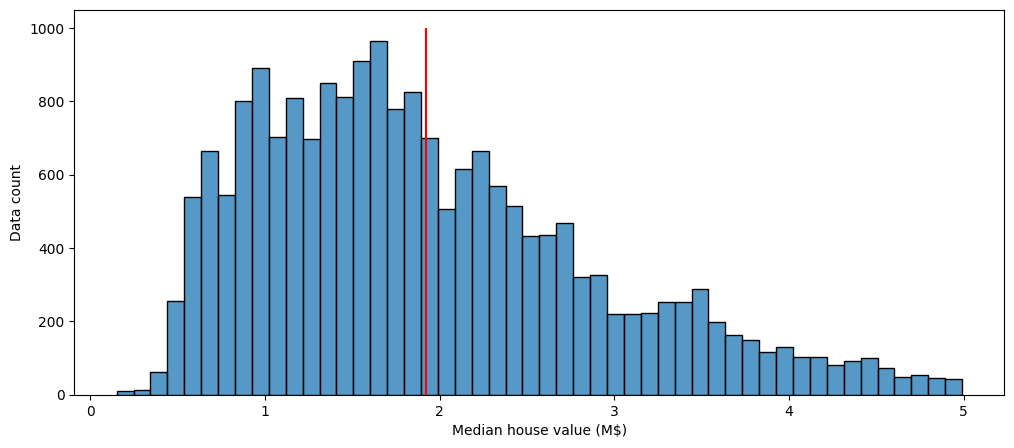

In [5]:
# Histogram plot
plt.figure(figsize=(12, 5))
sns.histplot(y)
plt.xlabel('Median house value (M$)')
plt.ylabel('Data count')
plt.vlines(np.mean(y), 0, 1000, color='red')

집 가격이 균등하게 분포되어 있지 않다.  
평균 값은 1.9이고 std는 0.98이다.  
그러나 정규분포를 따르지 않는다.   
분포는 skewed 상태이다.

### Mean squared error loss function

In [6]:
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=117)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = keras.Sequential([keras.Input(shape=(8,)),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(1)
                          ])

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

2023-09-26 16:34:56.835288: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2023-09-26 16:34:56.835307: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2023-09-26 16:34:56.835312: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2023-09-26 16:34:56.835347: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-26 16:34:56.835362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1, 
          callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=4))

Epoch 1/50
 13/360 [>.............................] - ETA: 1s - loss: 5.9955 - mean_squared_error: 5.9955  

2023-09-26 16:34:57.087335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


360/360 [==============================] - 2s 5ms/step - loss: 2.1896 - mean_squared_error: 2.1896 - val_loss: 0.5966 - val_mean_squared_error: 0.5966
Epoch 2/50
 13/360 [>.............................] - ETA: 1s - loss: 0.6663 - mean_squared_error: 0.6663

2023-09-26 16:34:58.823354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


360/360 [==============================] - 2s 5ms/step - loss: 0.9231 - mean_squared_error: 0.9231 - val_loss: 0.4485 - val_mean_squared_error: 0.4485
Epoch 3/50
360/360 [==============================] - 2s 4ms/step - loss: 0.9472 - mean_squared_error: 0.9472 - val_loss: 0.3991 - val_mean_squared_error: 0.3991
Epoch 4/50
360/360 [==============================] - 2s 5ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - val_loss: 0.3896 - val_mean_squared_error: 0.3896
Epoch 5/50
360/360 [==============================] - 2s 5ms/step - loss: 0.8052 - mean_squared_error: 0.8052 - val_loss: 0.3921 - val_mean_squared_error: 0.3921
Epoch 6/50
360/360 [==============================] - 2s 4ms/step - loss: 0.8696 - mean_squared_error: 0.8696 - val_loss: 0.4047 - val_mean_squared_error: 0.4047
Epoch 7/50
360/360 [==============================] - 2s 4ms/step - loss: 0.5760 - mean_squared_error: 0.5760 - val_loss: 0.3971 - val_mean_squared_error: 0.3971
Epoch 8/50
360/360 [===================

### Evaluation using quantiles of the target variable

학습데이터에 대한 loss 0.5551, 시험 데이터에 대한 loss 0.4045 정도가 나왔다.

타겟 변수를 1M 가격 범위에 해당하는 구간으로 나누고 각 구간내 샘플에 대한 MSE를 계산해본다.

In [10]:
y_pred = model.predict(X_test)

bins = np.arange(0, 5, 1)
ix = np.digitize(y_test, bins=bins)

109/215 [==============>...............] - ETA: 0s

2023-09-26 16:35:10.324245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


215/215 [==============================] - 0s 1ms/step


In [11]:
bins

array([0, 1, 2, 3, 4])

In [12]:
ix

array([4, 2, 3, ..., 3, 4, 1])

In [13]:
len(ix)

6877

In [14]:
y_test.shape

(6877,)

[Text(0, 0, '< 1'),
 Text(1, 0, '1-2'),
 Text(2, 0, '2-3'),
 Text(3, 0, '3-4'),
 Text(4, 0, '4-5')]

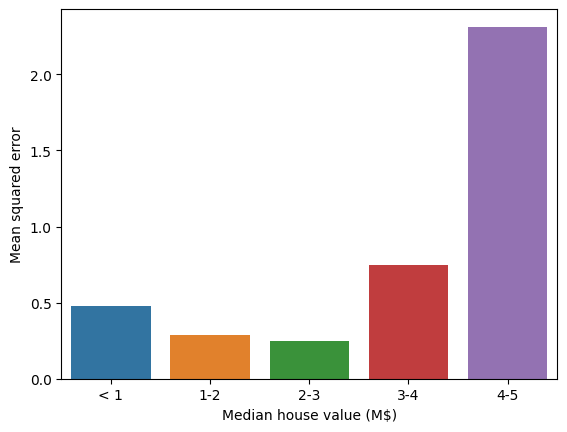

In [15]:
cats = []
scores = []

# calculate the associated MSE per bin
for ii in np.unique(ix):
    cond = ix == ii
    cats.append(ii)
    scores.append(mean_squared_error(y_test[cond], y_pred[cond]))
    
df_mse = pd.DataFrame(dict(bins=bins, mse=scores))

sns.barplot(data=df_mse, x='bins', y='mse')
ax=plt.gca()
ax.set_xlabel('Median house value (M$)')
ax.set_ylabel('Mean squared error')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['< 1', '1-2', '2-3', '3-4', '4-5'])

- 위 그림에서 보는 바와 같이 ML 모델은 타겟의 평균에 가까운 샘플에서 우수한 성능을 보인다.  
- 4백만 달러를 초과하는 구간에서는 오차가 크게 발생한다.

quantile evaluation은 ML이 데이터 셋의 여러 영역에서 어떻게 수행되었는지 살펴볼 수 있는 좋은 방법입니다.  이 빠른 분석은 실험 설정의 문제를 직접적으로 지적할 수 있으며, 전체 데이터 세트의 평균 성능 메트릭만 보고하기 전에 항상 이를 고려해야 합니다.

### Why does the model struggle to predict high house prices?  
Shortcut learning

모델은 대부분의 샘플에서 좋은 예측을 보였다.  
다만 400만달러를 초과하는 주택은 학습 데이터의 4% 정도밖에 안되기 때문에 모델이 예측에 우선순위를 두지 않는다.   

머신러닝 모들은 숏컷러닝에 빠지기 쉽다

숏컷은 표준 벤치마크에서는 잘 동작하지만 실제 시나리오 같이 더 까다로운 테스트 조건에서는 잘 동작하지 못하는 의사결정 규칙이다.   
비교 심리학, 교육학, 언어학에서는 지름길 학습이 생물학적, 인공적인 학습 시스템의 공통적인 특징일 수 있다는 점을 시사하는 관련 이슈가 알려져 있습니다.

Asking the right questions

따라서 주로 가치 있는 주택의 가격을을 추정하는 데 관심이 있는 **고급 부동산 중개인**을 위한 알고리즘을 개발 중이라고 가정해 보겠습니다.   
이 고객의 경우 현재 알고리즘은 관심 있는 주택의 종류에 대해 성능이 좋지 않기 때문에 원하는 예측력을 제공하지 못할 것입니다.

### Working with imbalanced data

Strategy 1: Increase the batch size

배치 크기를 늘리면 훈련 중에 표시되는 모든 배치에 대표성이 부족한 그룹의 샘플이 포함될 가능성이 높아집니다. 배치 크기를 512로 설정하고 모델 훈련을 반복합니다.

Strategy 2: Introduce weights in the loss function

여기서는 머신 러닝 알고리즘이 학습 중에 잘 드러나지 않는 샘플에 집중하도록 요청합니다. 이러한 샘플은 더 높은 가중치와 연관됩니다. 가중치는 직접 계산하여 Keras의 model.fit(..., sample_weights=...) 함수에 전달할 수 있습니다.

가중치 계산은 다음과 같이 진행한다.

- 빈당 샘플 발생 횟수 계산
- 총 샘플 수로 나누면 주어진 빈에 대한 샘플의 빈도를 얻을 수 있습니다.
- 이 값의 역은 관련 가중치입니다.

In [16]:
weights = np.zeros(len(y_train))
train_ix = np.digitize(y_train, bins=bins)

for ii in np.unique(train_ix):
    cond = train_ix == ii
    weights[cond] = 1 / (np.sum(cond) / len(cond))
    
# normalize weights to 1
weights /= np.sum(weights)

In [17]:
weights

array([3.74601985e-05, 1.46735143e-04, 3.74601985e-05, ...,
       3.74601985e-05, 6.25782228e-05, 1.46735143e-04])

In [18]:
model = keras.Sequential([keras.Input(shape=(8,)), 
                          keras.layers.Dense(32, activation='relu'), keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="adam", 
              metrics=["mean_squared_error"], weighted_metrics=["mean_squared_error"])
model.fit(X_train, y_train, sample_weight=weights, batch_size=32, epochs=50, validation_split=0.1, 
          callbacks=keras.callbacks.EarlyStopping(monitor='val_weighted_mean_squared_error', patience=4))

Epoch 1/50


 10/360 [..............................] - ETA: 1s - loss: 6.7168e-04 - mean_squared_error: 5.0870 - weighted_mean_squared_error: 8.1750   

2023-09-26 16:35:10.972172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


360/360 [==============================] - 2s 6ms/step - loss: 2.3892e-04 - mean_squared_error: 1.8194 - weighted_mean_squared_error: 3.0618 - val_loss: 8.0301e-05 - val_mean_squared_error: 0.5298 - val_weighted_mean_squared_error: 0.9945
Epoch 2/50


2023-09-26 16:35:13.094139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


360/360 [==============================] - 2s 6ms/step - loss: 1.0239e-04 - mean_squared_error: 1.2571 - weighted_mean_squared_error: 1.3122 - val_loss: 6.0762e-05 - val_mean_squared_error: 0.4995 - val_weighted_mean_squared_error: 0.7525
Epoch 3/50
360/360 [==============================] - 2s 6ms/step - loss: 1.0553e-04 - mean_squared_error: 1.3742 - weighted_mean_squared_error: 1.3524 - val_loss: 5.5703e-05 - val_mean_squared_error: 0.4752 - val_weighted_mean_squared_error: 0.6899
Epoch 4/50
360/360 [==============================] - 2s 6ms/step - loss: 1.0421e-04 - mean_squared_error: 1.3903 - weighted_mean_squared_error: 1.3356 - val_loss: 5.2281e-05 - val_mean_squared_error: 0.4614 - val_weighted_mean_squared_error: 0.6475
Epoch 5/50
360/360 [==============================] - 2s 6ms/step - loss: 1.2107e-04 - mean_squared_error: 1.9311 - weighted_mean_squared_error: 1.5516 - val_loss: 5.2857e-05 - val_mean_squared_error: 0.5040 - val_weighted_mean_squared_error: 0.6546
Epoch 6/50


 94/215 [============>.................] - ETA: 0s

2023-09-26 16:35:34.735211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


215/215 [==============================] - 0s 2ms/step


[Text(0, 0, '< 1'),
 Text(1, 0, '1-2'),
 Text(2, 0, '2-3'),
 Text(3, 0, '3-4'),
 Text(4, 0, '4-5')]

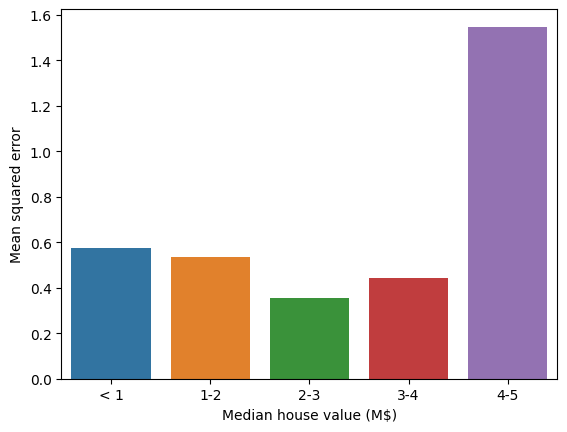

In [19]:
y_pred = model.predict(X_test)

bins = np.arange(0, 5, 1)
ix = np.digitize(y_test, bins=bins)

cats = []
scores = []

# calculate the associated MSE per bin
for ii in np.unique(ix):
    cond = ix == ii
    cats.append(ii)
    scores.append(mean_squared_error(y_test[cond], y_pred[cond]))
    
df_mse = pd.DataFrame(dict(bins=bins, mse=scores))

sns.barplot(data=df_mse, x='bins', y='mse')
ax=plt.gca()
ax.set_xlabel('Median house value (M$)')
ax.set_ylabel('Mean squared error')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['< 1', '1-2', '2-3', '3-4', '4-5'])

Strategy 3: Cast target values to normal distribution

타겟 변수가 정규 분포를 따르도록 변환합니다.  
정규 분포는 MSE 손실에 가장 적합하며 이상값의 특성을 줄여줍니다.  
중요 - 평가하기 전에 예측 값의 스케일을 다시 조정하는 것을 잊지 마세요!

In [20]:
yscaler = StandardScaler()
y_train = yscaler.fit_transform(y_train.values.reshape(-1, 1)).squeeze()

In [21]:
model = keras.Sequential([keras.Input(shape=(8,)),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(1)
                          ])

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1, 
          callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=4))

Epoch 1/50
 25/360 [=>............................] - ETA: 1s - loss: 1.5319 - mean_squared_error: 1.5319

2023-09-26 16:35:35.373336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


360/360 [==============================] - 2s 5ms/step - loss: 1.0005 - mean_squared_error: 1.0005 - val_loss: 0.4569 - val_mean_squared_error: 0.4569
Epoch 2/50
 12/360 [>.............................] - ETA: 1s - loss: 0.3479 - mean_squared_error: 0.3479

2023-09-26 16:35:37.266202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


360/360 [==============================] - 2s 5ms/step - loss: 0.9524 - mean_squared_error: 0.9524 - val_loss: 0.4246 - val_mean_squared_error: 0.4246
Epoch 3/50
360/360 [==============================] - 2s 5ms/step - loss: 0.7725 - mean_squared_error: 0.7725 - val_loss: 0.4184 - val_mean_squared_error: 0.4184
Epoch 4/50
360/360 [==============================] - 2s 5ms/step - loss: 0.7911 - mean_squared_error: 0.7911 - val_loss: 0.4499 - val_mean_squared_error: 0.4499
Epoch 5/50
360/360 [==============================] - 2s 5ms/step - loss: 0.6096 - mean_squared_error: 0.6096 - val_loss: 0.4399 - val_mean_squared_error: 0.4399
Epoch 6/50
360/360 [==============================] - 2s 5ms/step - loss: 0.4809 - mean_squared_error: 0.4809 - val_loss: 0.4258 - val_mean_squared_error: 0.4258
Epoch 7/50
360/360 [==============================] - 2s 5ms/step - loss: 0.4803 - mean_squared_error: 0.4803 - val_loss: 0.4310 - val_mean_squared_error: 0.4310


In [22]:
y_pred = model.predict(X_test)
y_pred = yscaler.inverse_transform(y_pred.reshape(-1, 1)).squeeze()

121/215 [===============>..............] - ETA: 0s

2023-09-26 16:35:48.117973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


215/215 [==============================] - 0s 1ms/step


[Text(0, 0, '< 1'),
 Text(1, 0, '1-2'),
 Text(2, 0, '2-3'),
 Text(3, 0, '3-4'),
 Text(4, 0, '4-5')]

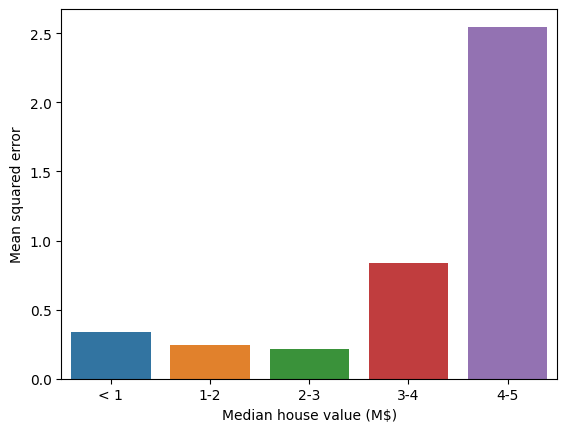

In [23]:
bins = np.arange(0, 5, 1)
ix = np.digitize(y_test, bins=bins)

cats = []
scores = []

# calculate the associated MSE per bin
for ii in np.unique(ix):
    cond = ix == ii
    cats.append(ii)
    scores.append(mean_squared_error(y_test[cond], y_pred[cond]))
    
df_mse = pd.DataFrame(dict(bins=bins, mse=scores))

sns.barplot(data=df_mse, x='bins', y='mse')
ax=plt.gca()
ax.set_xlabel('Median house value (M$)')
ax.set_ylabel('Mean squared error')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['< 1', '1-2', '2-3', '3-4', '4-5'])

### Evaluation

Which strategy performed best?

이제 세 가지 전략을 비교할 차례입니다.   
아래 그림에 요약된 대로 각 전략의 목표 변수 구간당 평균 제곱 오차를 추적했습니다.   
가장 높은 구간에만 집중할 경우 가중치 손실이 가장 좋은 성능을 보였습니다.   
평균 주택 가격에서는 알고리즘 성능이 떨어지지만, 가장 관심 있는 지역의 경우 예측력이 향상됩니다.   
배치 크기를 늘리고 대상 변수를 확장하는 다른 두 가지 전략은 최고 구간에서 평균 제곱 오차를 증가시키기도 합니다.   
따라서 이 방법들은 문제 해결에 도움이 되지 않는 것으로 입증되었습니다.

따라서 **고급 부동산 중개인**에게 가중치를 사용하여 데이터 세트에서 과소 대표되는 샘플을 강조하는 머신 러닝 알고리즘을 추천할 수 있습니다.   
그러나 머신 러닝은 경험적 과학이며, 다른 데이터 세트의 경우 불균형한 데이터 세트 문제에 대한 다른 해결책을 찾을 수 있습니다.

![Alt text](image.png)